<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week8%20-%20Regression/Exercise/Exercise_Regression_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Supervised Learning, Linear Regression

This exercise is an application of what you learned in the walkthrough. The following cell gather the different modules you need for this exercise (take a look at the sklearn library).

Some exercises consist of filling a part of the code without writing the whole code. Replace the `"YOUR CODE HERE"` by your own code.

In [1]:
# Useful starting lines
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import collections  as mc
import pandas as pd 
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

# Sklearn import
from sklearn.preprocessing import MinMaxScaler # Normalization
from sklearn.linear_model import LinearRegression # Regression linear model
from sklearn.model_selection import train_test_split # Splitting the data set
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Metrics for errors
from sklearn.model_selection import KFold # Cross validation



## 1. Load the data
We are going to use an advertisement data. The task is to figure out how different means of advertisement influence the amount of sales of a product.
     
Load the pandas dataset from the given URL. Then display the first 5 rows. How many observations  and columns we have? Hint: use the `shape` attribute.

In [2]:
url = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Advertising.csv'
# Load the data
ad_df = pd.read_csv(url)
display(ad_df.head())

# Observations and columns (dimensions)
print("Number of observations", ad_df.shape[0])
print("Number of dimensions", ad_df.shape[1])


,id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Number of observations 200
Number of dimensions 5


In what follows we will try a simple linear regression using only one feature (univariate regression), that is, we want to predict the `sales` using only the `TV` advertisments.

To get a first sense of the relationship between the different variables, display the correlation table.

In [3]:
# Display the correlation table of ['Sales', 'TV', 'Radio', 'Newspaper']
ad_df[['Sales', 'TV', 'Radio', 'Newspaper']].corr()

,Sales,TV,Radio,Newspaper
Sales,1.000000,0.782224,0.576223,0.228299
TV,0.782224,1.000000,0.054809,0.056648
Radio,0.576223,0.054809,1.000000,0.354104
Newspaper,0.228299,0.056648,0.354104,1.000000


## 2. Using Sklearn
When using sklearn we don't need to add a column of ones to the data in order to have the constant parameter. Sklearn takes care of it, you should just pass the `fit_intercept` argument to be True (which is also the default value for this argument).

1. From the advertising dataset, save the feature ``TV`` and the target `sales` in two different variables X and y respectively, in a dataframe pandas format and not as a series (`X[['sth']]` instead of `X['sth']`).
2. Split the data into a train and a test set. The test set size should be 20% of the original data. Additionally, set the `random_state` to 0 and `shuffle` to `True`.
3. Create a new Linear model from the `LinearRegression` module of sklearn. Make sure it includes an intercept. Fit the model with the corresponding data.  
4. Print the values of the slope and the constant.  
5. Predict the sales using the 12th TV value of X (hint: `iloc[[12]]`) with your model (i.e `.predict()`) and compare with the true value from y.
6. Compute the r2, MAE, and MSE.
7. Plot the regression.

In [4]:
# 1) Use the original dataframe
X = ad_df[["TV"]]
y = ad_df[["Sales"]]

In [5]:
# 2) Do the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

We don't normalize the data here, but this is how it would be done:
```
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
```

In [6]:
# 3) Create the linear model
LR = LinearRegression(fit_intercept=True)

# Fit the model using X and y
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# 4) Model output
print("Slope: %.4f" % LR.coef_.flatten()[0])
print("Constant (intercept): %.4f" % LR.intercept_[0])

Slope: 0.0460
Constant (intercept): 7.2925


In [8]:
# 5) Predict the Sales 
print("y_pred: %.4f" % LR.predict(X_test.iloc[[12]]).flatten()[0],  "y_true: ", y_test.iloc[12].Sales)

y_pred: 14.4973 y_true:  10.5


In [9]:
# 6) First you have to make the predictions for the test set
prediction = LR.predict(X_test)

# r2, MAE, and MSE 
print('R^2: %.2f' % r2_score(y_test, prediction))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, prediction))
print('Mean squared error: %.2f' % mean_squared_error(y_test, prediction))

R^2: 0.68
Mean absolute error: 2.51
Mean squared error: 10.19


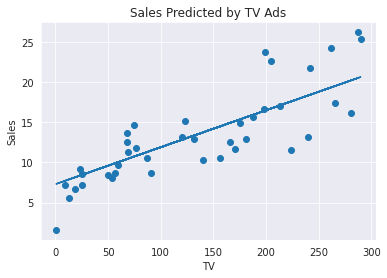

In [10]:
# 7) Plot of the regression
plt.scatter(X_test, y_test)
# When using the MinMaxScaler, replace X_test with X_test[0] below
plt.plot(X_test, prediction)
plt.title('Sales Predicted by TV Ads')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

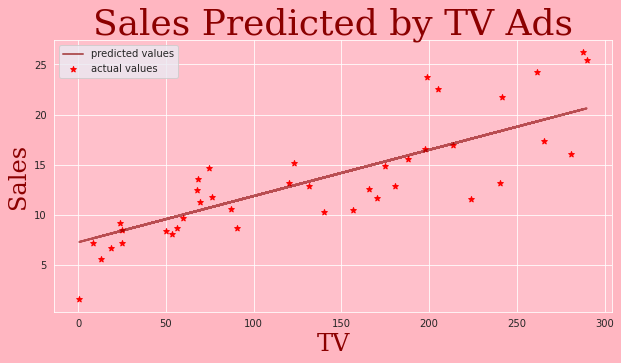

In [11]:
# Bonus: The same graph as above, we just made it pretty
plt.figure(figsize=(10,5), facecolor='lightpink')
plt.axes().set_facecolor('pink')
plt.scatter(X_test, y_test, color='red', alpha=1, marker='*', label='actual values')
# When using the MinMaxScaler, replace X_test with X_test[0] below
plt.plot(X_test, prediction, color='darkred', alpha=0.6, linestyle='-', linewidth=2, label='predicted values')
plt.title("Sales Predicted by TV Ads", fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 36})
plt.xlabel('TV', fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 24})
plt.ylabel('Sales', fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 24})
plt.legend()
plt.show()

When you use this single-variate model, you can simply switch the features (TV, Radio, Newspaper) to see which predicts the target variable (Sales) the best. Which feature predicts the sales best?

**Hint:** Simply change the target variable and re-run the cells above. Then compare the evaluation metrics (r2, MAE and MSE).

In [12]:
Evaluation = pd.DataFrame(index=['Slope', 'Constant', 'r2', 'MAE', 'MSE'])
for feature in ['TV', 'Radio', 'Newspaper']:
  X = ad_df[[feature]]
  y = ad_df[["Sales"]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
  scaler = MinMaxScaler()
  # scaler.fit(X_train)
  # X_train = pd.DataFrame(scaler.transform(X_train))
  # X_test = pd.DataFrame(scaler.transform(X_test))
  LR = LinearRegression(fit_intercept=True)
  LR.fit(X_train, y_train)
  prediction = LR.predict(X_test)
  Evaluation[feature] = [LR.coef_.flatten()[0], LR.intercept_[0], r2_score(y_test, prediction), mean_absolute_error(y_test, prediction), mean_squared_error(y_test, prediction)]
Evaluation.round(decimals = 2)

,TV,Radio,Newspaper
Slope,0.05,0.21,0.06
Constant,7.29,9.39,12.40
r2,0.68,0.23,-0.02
MAE,2.51,3.72,4.70
MSE,10.19,24.24,32.14


The model predicting `Sales` with `TV` has the highest r2, lowest MAE, and lowest MSE. It is followed by `Radio`, leaving `Newspaper` as the "worst" of the three models.

## 3. Using more features for prediction
Let's try to use more features to predict the sales. For example we can observe the effect of TV and Radio advertisment in the same time.

1. From the advertising dataset, save the features ``TV`` and `Radio` in to X  and the target `sales` into y, in a dataframe pandas format (`X[['sth']]` instead of `X['sth']`).
2. Split the data into a train and a test set. The test set size should be 20% of the original data. Additionally, set the `random_state` to 0 and `shuffle` to `True`.
3. Create a new Linear model from the `LinearRegression` module of sklearn. Fit the model with the corresponding data.
4. Print the parameters of the slope and the constant (intercept).
5. Predict the sales using the 12th TV value of X (hint: iloc[[12]]) with your model (i.e .predict()) and compare with the true value from y.  
6. Compute the r2 (`r2_score`), MAE (`mean_absolute_error`), and MSE (`mean_squared_error`).



In [13]:
# 1) Use the original dataframe
X = ad_df[["TV", "Radio"]]
y = ad_df[["Sales"]]

In [14]:
# 2) Do the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

We don't normalize the data here, but this is how it would be done:
```
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
```

In [15]:
# 3) Create the linear model
LR = LinearRegression(fit_intercept=True)

# Fit the model using X and y
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# 4) Parameters and Intercept
print("Parameters: ", LR.coef_)
print("Intercept: ", LR.intercept_)

Parameters:  [[0.04451639 0.19520741]]
Intercept:  [2.95144076]


In [17]:
# 5) Predict the sales
print("y_pred: %.4f" % LR.predict(X_test.iloc[[12]]).flatten()[0],  "y_true: ", y_test.iloc[12].Sales)

y_pred: 10.4302 y_true:  10.5


In [18]:
# 6) First you have to make the predictions for the test set
prediction = LR.predict(X_test)

# r2, MAE, and MSE 
print('R^2: %.2f' % r2_score(y_test, prediction))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, prediction))
print('Mean squared error: %.2f' % mean_squared_error(y_test, prediction))

R^2: 0.86
Mean absolute error: 1.37
Mean squared error: 4.39


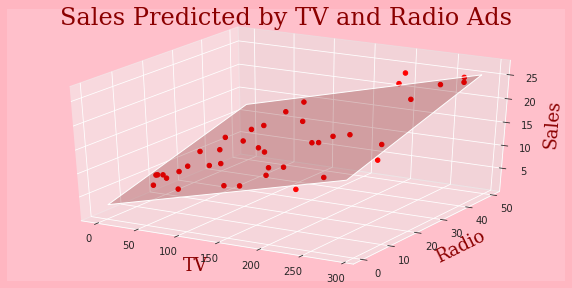

In [19]:
# Bonus: Here is how you could plot this regression
x1_range = np.arange(X_test.iloc[:, 0].min(), X_test.iloc[:, 0].max())
x2_range = np.arange(X_test.iloc[:, 1].min(), X_test.iloc[:, 1].max())
x1, x2 = np.meshgrid(x1_range, x2_range)
y = LR.intercept_[0] + LR.coef_[0][0]*x1 + LR.coef_[0][1]*x2

fig = plt.figure(figsize=(10,5), facecolor='lightpink')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('pink')
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_test, alpha=1, color='red')
ax.plot_surface(x1, x2, y, rstride=50, cstride=300, color='darkred', alpha=0.25)
ax.set_title("Sales Predicted by TV and Radio Ads", fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 24})
ax.set_xlabel('TV', fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 18})
ax.set_ylabel('Radio', fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 18})
ax.set_zlabel('Sales', fontdict={'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 18})
plt.show()

Did the model metrics (r2, MAE, MSE) improve significantly when `Radio` was added to the features to predict `Sales`? Did the model become "better"?

In [20]:
# Compute by how much each of the metrics changed in comparaison to the single-variate model
print('Variation in r2:  ', round(r2_score(y_test, prediction) - 0.68, 2))
print('Variation in MAE:', round(mean_absolute_error(y_test, prediction) - 2.51, 2))
print('Variation in MSE:', round(mean_squared_error(y_test, prediction) - 10.19, 2))

Variation in r2:   0.18
Variation in MAE: -1.14
Variation in MSE: -5.8


Every evaluation metric significatly improved (increase in r2, decrease in MAE and MSE), therefore we can concluded that the model became "better".

## 4. Using all features
Redo steps 1-6 with `TV`, `Radio`, and `Newspaper` as features predicting `Sales`.

In [21]:
# Find the features and the target
X = ad_df[["TV", "Radio", "Newspaper"]]
y = ad_df[["Sales"]]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
# The scaling would take place here
# Create and fit the linear regression model
LR = LinearRegression(fit_intercept=True)
LR.fit(X_train, y_train)
# Display the various parameters
print("The Model Parameters:", "\nw_0 (constant):  ", round(LR.intercept_[0], ndigits=3), "\nw_1 (TV):        ", round(LR.coef_[0][0], ndigits=3), "\nw_2 (Radio):     ", round(LR.coef_[0][1], ndigits=3), "\nw_3 (Newspaper):", round(LR.coef_[0][2], ndigits=3))
# Make a prediction for the 12th obsercation
print('\nPrediction for the 12th Observation:', "\ny_pred: %.4f" % LR.predict(X_test.iloc[[12]]).flatten()[0],  "y_true: ", y_test.iloc[12].Sales)
# Compute the model metrics 
prediction = LR.predict(X_test)
print('\nMetrics to Judge the Model:', '\nR^2: %.2f' % r2_score(y_test, prediction), '\nMean absolute error: %.2f' % mean_absolute_error(y_test, prediction), '\nMean squared error: %.2f' % mean_squared_error(y_test, prediction))

The Model Parameters: 
w_0 (constant):   2.995 
w_1 (TV):         0.045 
w_2 (Radio):      0.196 
w_3 (Newspaper): -0.003

Prediction for the 12th Observation: 
y_pred: 10.4646 y_true:  10.5

Metrics to Judge the Model: 
R^2: 0.86 
Mean absolute error: 1.36 
Mean squared error: 4.40
